# Домашнее задание по курсу «Прикладная математика. Искусство и ремесло вычислений». 


# Задача №1

In [34]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from sympy import *

In [35]:
#Зададим m и k, мой номер подгруппы и номер в списке
m = 2
k = 14

Необходимо построить сплайн степени 2,2 с полюсом в x=14 и исходными данными из задачи.
Для начала построим вспомогательную функцию, из двух таких функций будет состоять сплайн, она похожа на интерполяционный многочлен Лагранжа, но несколько модифицирована, тем что в x=k находится полюс.

In [36]:
# функция, которая возвращает интерполяционный многочлен Лагранжа
def L_basis_polinomial(x_net, data, y_data):

    """x_net - (список)сетка, в которой будут считаться значения;
       data - (список) начальные x для построения полинома;
       y_data - (список) начальные у для построения полинома;
       все списки numpy array, иначе выдаст ошибку"""

    # vector будет вектором с базисными полиномами
    vector = np.zeros(len(data)).tolist()
    
    for i in range(len(data)):

        sup_vec = data[data != data[i]]
        # mul это i базисный полином
        mul = 1
        for j in range(len(sup_vec)):
            mul = np.multiply(mul, (x_net-sup_vec[j])/(data[i]-sup_vec[j]))
            
        vector[i] = mul*(data[i]-k)/(x_net-k)
    
    #тут из базисных полиномов делаем один итоговый
    lagrange = np.dot(y_data, vector)
    return lagrange

Теперь же применим эту функцию дважды на разных промежутках, получим сплайн с узлом в точке x = 2*(2***(1/2)) и полюсом в x = 14, для удобства полюс изображен на отдельной картинке

In [37]:
setka1 = np.arange(-4, m*(2**(1/2)), 1e-3)
setka2 = np.arange(m*(2**(1/2)), 7, 1e-3)

x1 = np.array([-m, 7**(1/2), m*(2**(1/2))])
y1 = np.array([1, 7**(1/2), -k])

x2 = np.array([7**(1/2), m*(2**(1/2)), 2*(7**(1/2))])
y2 = np.array([7**(1/2), -k, -2*(7**(1/2))])

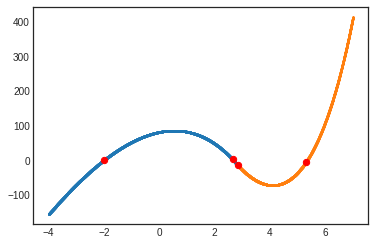

In [38]:
fig, ax = plt.subplots()
ax.scatter(setka1, L_basis_polinomial(setka1, x1, y1), s=1)
ax.scatter(setka2, L_basis_polinomial(setka2, x2, y2), s=1)
ax.scatter([-m, 7**(1/2), m*(2**(1/2)), 2*(7**(1/2))], [1, 7**(1/2), -k, -2*(7**(1/2))], s=40, c='r')

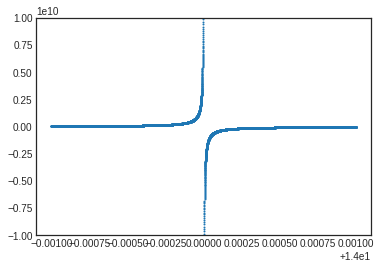

In [39]:
setka3 = np.arange(13.999, 14.001, 1e-7)
x3 = np.array([7**(1/2), m*(2**(1/2)), 2*(7**(1/2))])
y3 = np.array([7**(1/2), -k, -2*(7**(1/2))])
fig, ax = plt.subplots()
ax.set_ylim(-1e10, 1e10)
ax.scatter(setka3, L_basis_polinomial(setka3, x3, y3), s=1)

# Задача №2

Найдем первый интеграл следующего уравнения: \
$x'' ± 2*x^{15} = 0$ \
$(x')^2 ± x^{16}/4 = C$

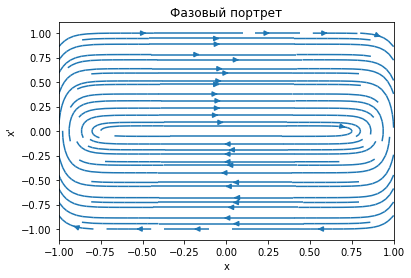

In [7]:
#Зададим m и k
m=2
k=14
#Зададим сетку
x = np.linspace(-1,1)
y = np.linspace(-1,1)
X, Y=np.meshgrid(x, y)
#Зададим уравнение
dx=Y
dy=-m*X**(k+1)
#Нарисуем фазовый портрет
fig, ax=plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('x\'')
ax.set_title('Фазовый портрет')
ax.streamplot(X, Y, dx, dy)

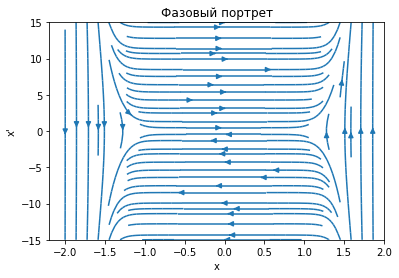

In [8]:
#Зададим сетку
x = np.linspace(-2,2, 200)
y = np.linspace(-15,15, 600)
X, Y=np.meshgrid(x, y)
#Зададим уравнение
dx=Y
dy=m*X**(k+1)
#Нарисуем фазовый портрет
fig, ax=plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('x\'')
ax.set_title('Фазовый портрет')
ax.streamplot(X, Y, dx, dy)

# Задача №3

Дана система уравнений: \
$
\begin{equation*}
\begin{cases}
x'' = m(y-x)/k 
\\
y'' = -m(y-x)
\end{cases}
\end{equation*}
$
\
Сделаем замены \
$z_{1} = x$ \
$z_{2} = x'$ \
$z_{3} = y$ \
$z_{4} = y'$  
Получим следующую систему уравнений:
\begin{equation*}
 \begin{cases}
   z_{1}' = z_{2} 
   \\
   z_{3}' = z_{4}
   \\
   z_{2}' = m(z_{3}-z_{1})/k
   \\
   z_{4}' = -m(z_{3}-z_{1})
 \end{cases}
\end{equation*}

Что соответствует записи:
\begin{equation*}
\left(
\begin{array}{cccc}
z_{1}'\\
z_{2}'\\
z_{3}'\\
z_{4}'
\end{array}
\right) = \left(
\begin{array}{cccc}
0 & 1 & 0 & 0\\
-m/k & 0 & m/k & 0\\
0 & 0 & 0 & 1\\
m & 0 & -m & 0
\end{array}
\right)*\left(
\begin{array}{cccc}
z_{1}\\
z_{2}\\
z_{3}\\
z_{4}
\end{array}
\right)
\end{equation*}
Найдем собственные числа и векторы матрицы этой системы

In [9]:
m = 2
k = 14

A = np.matrix([[0, 1, 0, 0], 
               [-m/k, 0, m/k, 0], 
               [0, 0, 0, 1], 
               [m, 0, -m, 0]])
w, v = np.linalg.eig(A)

In [10]:
w

array([-2.32169314e-102+0.j        ,  0.00000000e+000+1.46385011j,
        0.00000000e+000-1.46385011j,  0.00000000e+000+0.j        ])

Видно что два собственных числа это ноль, значит есть кратное собственное число, приведем матрицу к нормальной жордановой форме

In [11]:
M = Matrix([[2, -1], 
            [9, -4]])

P,J=M.jordan_form()
P

Matrix([
[3, 1],
[9, 0]])

In [12]:
np.matrix([[2, -1],[9, -4]])**10

matrix([[-29,  10],
        [-90,  31]])

После замены $\overline{L}=C^{-1}\overline{Z}$, где С вектор из собственных чисел получим следующее уравнение:
\begin{equation*}
\left(
\begin{array}{cccc}
l_{1}'\\
l_{2}'\\
l_{3}'\\
l_{4}'
\end{array}
\right) = \left(
\begin{array}{cccc}
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & -1.4638501094228i & 0\\
0 & 0 & 0 & 1.4638501094228i
\end{array}
\right)*\left(
\begin{array}{cccc}
l_{1}\\
l_{2}\\
l_{3}\\
l_{4}
\end{array}
\right)
\end{equation*} 

Это можно разделить на две независимые системы
\begin{equation*}
 \begin{cases}
   l_{1}' = l_{2} 
   \\
   l_{2}' = 0
 \end{cases}
\end{equation*}
\begin{equation*}
 \begin{cases}
   l_{3}' = -1.4638501094228i*l_{3} 
   \\
   l_{4}' = 1.4638501094228i*l_{4}
 \end{cases}
\end{equation*}
Если теперь перейти к изначальным обозначениям, т.е. к X, то эти системы будут второго порядка, однако, чтобы не заграмождать запись (матрица обратная к собственным векторам, довольно громоздка) построим фазовый портрет в терминах $\overline{L}$

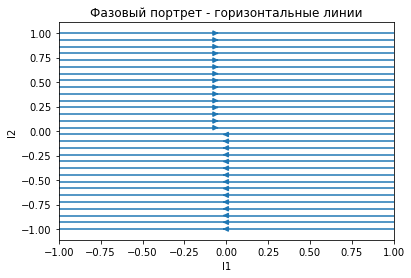

In [13]:
#Зададим m и k
m=2
k=14

#Зададим сетку
x = np.linspace(-1,1)
y = np.linspace(-1,1)
X, Y=np.meshgrid(x, y)

#Зададим уравнение
dx=Y
dy=X*0

#Нарисуем фазовый портрет
fig, ax=plt.subplots()
ax.set_xlabel('l1')
ax.set_ylabel('l2')
ax.set_title('Фазовый портрет - горизонтальные линии')
ax.streamplot(X, Y, dx, dy)

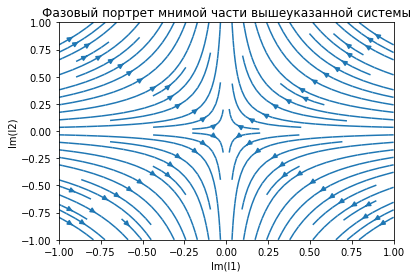

In [14]:
#Зададим уравнение
dx= -1*X*1.4638501094228
dy= Y*1.4638501094228

#Нарисуем фазовый портрет
fig, ax=plt.subplots()
ax.set_xlabel('Im(l1)')
ax.set_ylabel('Im(l2)')
ax.set_title('Фазовый портрет мнимой части вышеуказанной системы')
ax.streamplot(X, Y, dx, dy)

# Задача №4

Дана система:
\begin{equation*}
 \begin{cases}
   x' = 0.02x-arctan(14z) 
   \\
   y' = x-0.04y
   \\
   z' = y-2z
 \end{cases}
\end{equation*}
Стационарная точка находится путем приравнивания производных к 0, и она получается только одна (0;0;0).
Тогда составим матрицу якоби и найдем характеристический многочлен: 
\begin{equation*}
\left(
\begin{array}{cccc}
-0.02-λ & 0 & -14\\
1 & -0.04-λ & 0\\
0 & 1 & -2-λ
\end{array}
\right)=(-0.02-λ)(-0.04-λ)(-2-λ)-14=0
\end{equation*}

Теперь раскроем скобки, умножим на -1 получим следующий характеристический многочлен:                        
$λ^3$+2.06$λ^2$+0.1208λ+14.0016                      
и из полученного хар-кого многочлена составим матрицу Гурвица: 
\begin{equation*}
\left(
\begin{array}{cccc}
2.06 & 14.0016 & 0\\
1 & 0.1208 & 0\\
0 & 2.06 & 14.0016
\end{array}
\right)
\end{equation*}
Поскольку минор 2.06\*0.1208-1\*14.0016<0, то критическая точка не устойчива

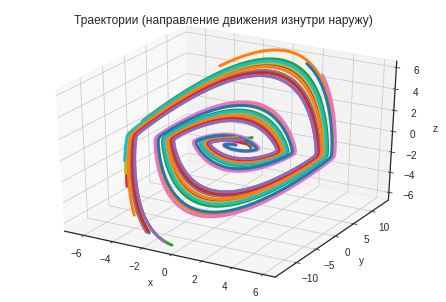

In [26]:
#зададим систему дифуров, данную изначально
def deffur(y, t):
    y1, y2, y3 = y
    return [0.02*y1-np.arctan(14*y3), y1-0.04*y2, y2-2*y3]

#тут генерируем необходимые 15 точек, которые будут не далеко от нуля
y_all = []
for i in range(15):
  y_all.append(np.random.sample(3))

#создадим график
t = np.linspace(0,25,501)
fig = plt.figure(facecolor='white')
ax=Axes3D(fig)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Траектории (направление движения изнутри наружу)')

#решим уравнение и отразим это на графике
for y0 in y_all:
    [y1,y2,y3]=odeint(deffur, y0, t, full_output=False).T
    ax.plot(y1,y2,y3,linewidth=3)

У системы имеется предельный цикл поскольку можно выделить параллелепипед                  
 $|x|<25π$              
$|y|<25^2π$                   
$|z|<\pi25^2/2$            
На его окраине траектории направлены внутрь, а точка (0 0 0) не устойчива значит, где-то внутри этого параллелипипеда есть устойчивый цикл.